## Wat moet er gerapporteerd kunnen worden?
- Oplosgraad incidenten
- Oplosgraad door KIR-team
- Splitsing tussen GEO, AM en Infrax

In [93]:
import pandas as pd

#### Download lijst incidenten vanuit Xtraction: 
- 'Folders' --> 'Shared Folders' --> 'Incident' --> 'Incident Resultaten Support Team (historiek)'
- Filteren op 'Appl Netten GEO' en op datum

In [182]:
# Import historiek incident resultaten en mergen
geo = "C:\\Users\\SWP679\\Desktop\\Incident resultaten Support Team (historiek).xlsx"
am = "C:\\Users\\SWP679\\Desktop\\Incident resultaten Support Team (AM).xlsx"
incidenten_geo = pd.read_excel(geo, sheet_name='Afgesloten incidenten (lijst)', header=2)
incidenten_am = pd.read_excel(am, sheet_name='Afgesloten incidenten (lijst)', header=2)

incidenten = incidenten_geo.append(incidenten_am, ignore_index=True)

In [183]:
# Overbodige kolommen verwijderen
labels = ["CI", "Assign Count", "Customer Resolution Html", "Is VIP?", 
          "Date Last Closed", "Assigned Group", "Assigned To"]
incidenten = incidenten.drop(labels, axis=1)
incidenten.head()

,Incident ID,Incident Source,Is Breached,Response Level,Summary,Technical Resolution,Article,Customer,Date Created,Date Last Resolved,Status,Resolution Group Name,Resolution User
0,325657,Phone,Yes,Priority 4,"Bentleymap start niet, crasht regelmatig",Dieter zal nieuwe versie aanvragen.,EAN2548 Bentleymap andere incidenten,HXM519 - Dieter Robberechts,2017-11-23 06:50:16,2018-01-15 13:15:24,Closed,Appl Netten GEO,GHG127 - Anneleen Robbe
1,327601,Email,Yes,Priority 4,Standalonemap stopped working.,64-bit PC is in orde gebracht en zal in de loo...,"EAN4460 Geoview / geolis / geolig melding: "" M...",GCJ099 - Kristof Baele,2017-12-07 16:33:02,2018-12-18 13:00:48,Closed,Appl Netten GEO,QTP864 - Ken Bergers
2,329373,Phone,Yes,Priority 4,Oracle Error,Connectiviteit werd hersteld,EAN2258 GeoView GeoLis andere incidenten,RHR862 - Shana vervloet,2017-12-19 16:36:12,2018-01-09 14:46:29,Closed,Appl Netten GEO,GHG127 - Anneleen Robbe
3,329383,Email,Yes,Priority 4,Onderwerp: incident 224510,Incident werd verwijderd,EAN2258 GeoView GeoLis andere incidenten,FGE008 - Dorine Hennebel,2017-12-19 17:50:51,2018-01-09 14:54:49,Closed,Appl Netten GEO,GHG127 - Anneleen Robbe
4,329449,Email,Yes,Priority 4,Onderwerp: FW: verleggen grens Aarschot/Tielt ...,MS grens Tielt-Winge aangemaakt,EAN2258 GeoView GeoLis andere incidenten,EFH383 - Stijn de Walef,2017-12-20 11:17:38,2018-02-01 11:14:53,Closed,Appl Netten GEO,BJF331 - Joris Vanderloock


In [189]:
# Splitsen in AM en GEO incidenten
AM_apps = ["nemesis", "pq", "ov web", "straatlampen", "nemora", "wevab", "iq plus"]
teamgeo = ['GHG127 - Anneleen Robbe', 'BJF331 - Joris Vanderloock', 'GAH048 - Gert Van Dyck',
           'GHF281 - Didier Van Belleghem', 'JAD401 - Nick Ceulemans',
           'ERN417 - Marieke Algoed', 'IHZ211 - Philip De Vos',
           'PPC524 - Katrien Verbeek', 'GBE165 - Gunther Daneels',
           'LZM524 - Bernhard Bannink', 'PNF248 - Erwin Munters']

for i in incidenten.index:
    article = str(incidenten.loc[i, "Article"]).lower()
    user = str(incidenten.loc[i, "Resolution User"])
    if any(app in article for app in AM_apps) and (user not in teamgeo):
        incidenten.loc[i, "Resolution Group Name"] = 'AM'
    else:
        incidenten.loc[i, "Resolution Group Name"] = 'GEO'

In [178]:
incidenten[incidenten["Resolution Group Name"]=='AM']["Resolution User"].value_counts()

QTP864 - Ken Bergers              264
FGF358 - Tom Maes                  15
HIE161 - Tim De Bondt              12
JPR524 - Dieter De Vleeshouwer     12
HAC226 - Alain Van den Abbeele     10
GMQ011 - Willem Fouquart            7
AAE146 - Riet De Vos                2
EWF012 - Petra Lambrecht            1
Name: Resolution User, dtype: int64

In [179]:
# Dit artikel zit automatisch bij GEO. Kijk na of er geen opvallend groot aantal AM gevallen zijn
#incidenten[incidenten["Article"]=='EAN0834 EAI melding Operaties & Monitoring']["Summary"].unique()

In [186]:
# Kijk na of alle Infrax collega's zijn toegevoegd in de lijst
infrax_collegas = ["LZM524", "NQB004", "PJS862", "PNF248", "RHC604"]
incidenten["Resolution User"].unique()

array(['GHG127 - Anneleen Robbe', 'QTP864 - Ken Bergers',
       'BJF331 - Joris Vanderloock', 'GAH048 - Gert Van Dyck',
       'GHF281 - Didier Van Belleghem', 'JAD401 - Nick Ceulemans',
       'ERN417 - Marieke Algoed', 'IHZ211 - Philip De Vos',
       'PPC524 - Katrien Verbeek', 'GBE165 - Gunther Daneels',
       'LZM524 - Bernhard Bannink', 'PNF248 - Erwin Munters',
       'HIE161 - Tim De Bondt', nan, 'FGF358 - Tom Maes',
       'JPR524 - Dieter De Vleeshouwer', 'EWF012 - Petra Lambrecht',
       'HAC226 - Alain Van den Abbeele', 'GMQ011 - Willem Fouquart',
       'AAE146 - Riet De Vos'], dtype=object)

In [190]:
# Toevoegen Infrax Groep
for i in incidenten.index:
    user = str(incidenten.loc[i, "Resolution User"])[0:6]
    if user in infrax_collegas:
        incidenten.loc[i, "Resolution Group Name"] = "I"

incidenten["Resolution Group Name"].value_counts()

GEO    1334
AM      323
I        65
Name: Resolution Group Name, dtype: int64

In [240]:
# Toevoegen KIR kolom
incidenten["KIR"] = 0
for i in incidenten.index:
    user = str(incidenten.loc[i, "Resolution User"])[0:6]
    if user == "QTP864":
        incidenten.loc[i, "KIR"] = 1

incidenten["KIR"].value_counts()

1    1210
0     512
Name: KIR, dtype: int64

In [191]:
# Convert to datetime
from datetime import datetime
import re

try:
    incidenten["Date Created"] = incidenten["Date Created"].apply(lambda x: datetime.strptime(x, "%d/%m/%Y %H:%M"))
except TypeError:
    print("Striptime already done!")


Striptime already done!


In [12]:
# Filter only incidents created in July or August
# incidenten["month_created"] = incidenten["Date Created"].apply(lambda x: x.month)
# test = incidenten[(incidenten["month_created"]==10)]
# test.tail()

,Complexiteit,Groep,Incident ID,CI,Incident Source,Is Breached,Assign Count,Response Level,Summary,Technical Resolution,...,Is VIP?,Date Created,Date Last Resolved,Date Last Closed,Status,Assigned Group,Assigned To,Resolution Group Name,Resolution User,month_created
228,2,G,353947,CPS Direct (P),Phone,No,2.0,Priority 4,Geen resultaten van plots verstuurd naar CPS_T...,Queu batch is vastgelopen. Terug heropgestart,...,No,2018-07-02 14:21:00,2/07/2018 15:31,5/07/2018 23:31,Closed,Service Desk 1st Line,NaN,Appl Netten GEO,QTP864 - Ken Bergers,7
229,2,G,353910,NaN,Self Service,No,3.0,Priority 3,MF162 (CreateMobileIntervention) berichten in ...,"Mag genegeerd worden, interventie zit niet mee...",...,No,2018-07-02 12:51:00,2/07/2018 13:15,5/07/2018 23:31,Closed,Service Desk 1st Line,NaN,Appl Netten GEO,QTP864 - Ken Bergers,7
230,4,A,353752,NaN,Self Service,Yes,5.0,Priority 3,NMP982P (Nemesis extract) job in error (maande...,DB only fix uitgerold,...,No,2018-07-02 09:25:00,6/08/2018 11:31,8/08/2018 23:33,Closed,Service Desk 1st Line,NaN,Appl Netten AM,QTP864 - Ken Bergers,7
231,2,G,353722,GeoView (P),Email,No,3.0,Priority 4,Onderwerp: probleem Geolis cabine 504 Jodenstr...,Voor één of andere reden is de leiding tussen ...,...,No,2018-07-02 08:51:00,4/07/2018 8:55,6/07/2018 23:30,Closed,Service Desk 1st Line,NaN,Appl Netten GEO,QTP864 - Ken Bergers,7
232,2,G,353700,GeoLig (P),Phone,No,2.0,Priority 4,Kan niet prikken in Geolig,Gebruiker toegekend aan rechtengroep G.07.GeoL...,...,No,2018-07-02 08:36:00,2/07/2018 10:00,4/07/2018 23:31,Closed,Service Desk 1st Line,NaN,Appl Netten GEO,QTP864 - Ken Bergers,7


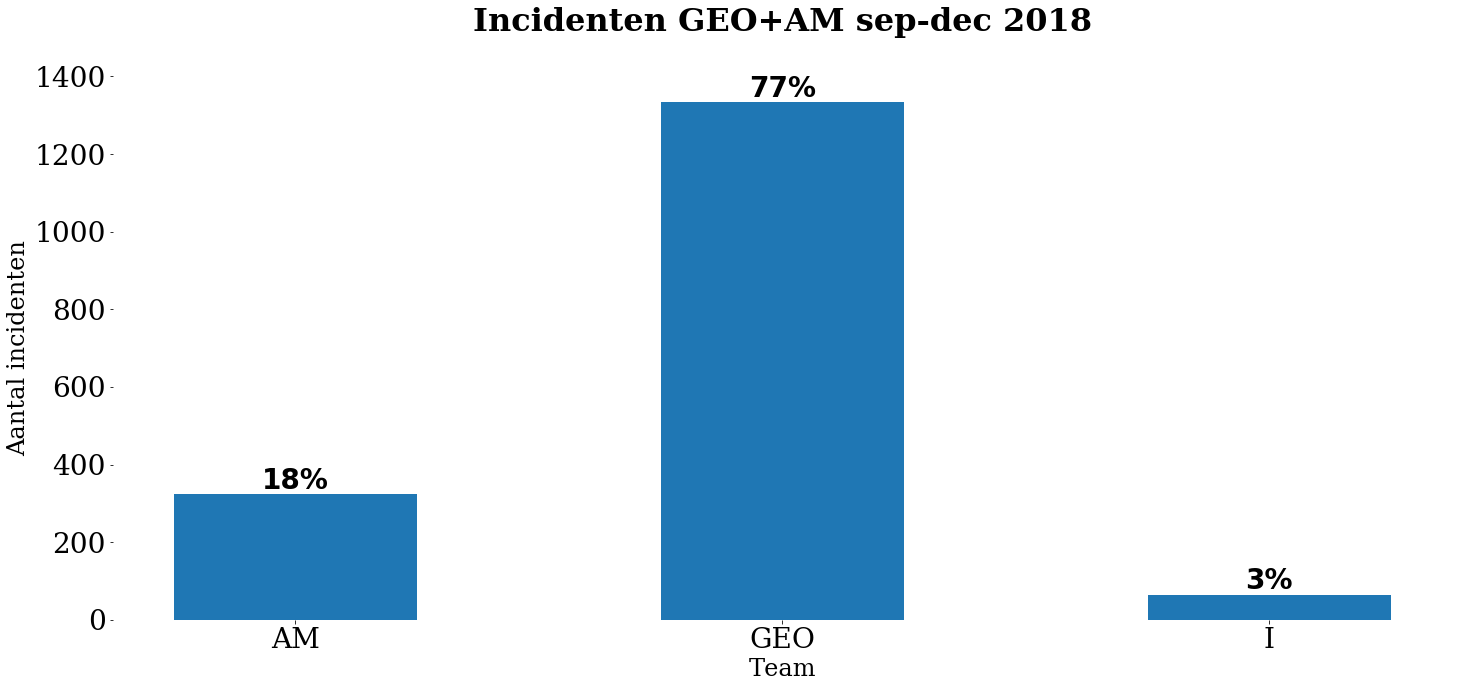

In [258]:
# Functie om plot aan te maken
import matplotlib.pyplot as plt
from numpy import arange

plt.rcParams["font.family"] = "serif"

textfont = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'bold',
        'size': 28,
        }

def barplot(series, barwidth, xlabel, ylabel, pngname, plottitle):
    proportie = [int(x/series.sum()*100) for x in series]
    fig = plt.figure(figsize=(24, 10))
    ax = fig.add_subplot(1,1,1)
    bar_positions = arange(len(series.values)) + 1
    ax.bar(bar_positions, series.values, width=barwidth)
    tick_positions = range(1,(len(series.values)+1))
    ax.set_xticks(tick_positions)
    ax.set_xticklabels(series.index)
    ax.set_xlabel(xlabel, fontsize=24)
    ax.set_ylabel(ylabel, fontsize=24)
    ax.tick_params(labelsize=28)
    ax.set_title(plottitle, fontsize=32, pad=45, fontweight='bold') # Titel van plot
    for i, v in enumerate(proportie):
        ax.text(i+1, series[i]+(0.01*max(series.values)), str(v)+"%", horizontalalignment='center', color='black', fontdict=textfont)
    ax.set_frame_on(b=False)
    today = datetime.today().strftime('%Y%m%d')
    plt.savefig(pngname+"_"+today+".png") # Exporteren plot naar png
    plt.show() 

incident_by_team = incidenten.groupby(by=["Resolution Group Name"]).count()["Incident ID"]

barplot(incident_by_team, 0.5, "Team", "Aantal incidenten", "incidentByTeam", "Incidenten GEO+AM sep-dec 2018")

In [303]:
#incidenten_ean = incidenten[(incidenten["Resolution Group Name"]=="AM")|(incidenten["Resolution Group Name"]=="GEO")]
#incidenten_ean_KIR = incidenten_ean.groupby(by=["KIR"]).count()["Incident ID"]
#barplot(incidenten_ean_KIR, 0.5, "Opgelost door KIR=1", "Aantal incidenten", "incidentByKIR_GeoAM", "Incidenten GEO+AM-Infrax sep-dec 2018")

In [304]:
#incidenten_eanAM_KIR = incidenten[incidenten["Resolution Group Name"]=="AM"].groupby(by=["KIR"]).count()["Incident ID"]
#barplot(incidenten_eanAM_KIR, 0.5, "Opgelost door KIR=1", "Aantal incidenten", "incidentByKIR", "Incidenten AM sep-dec 2018")

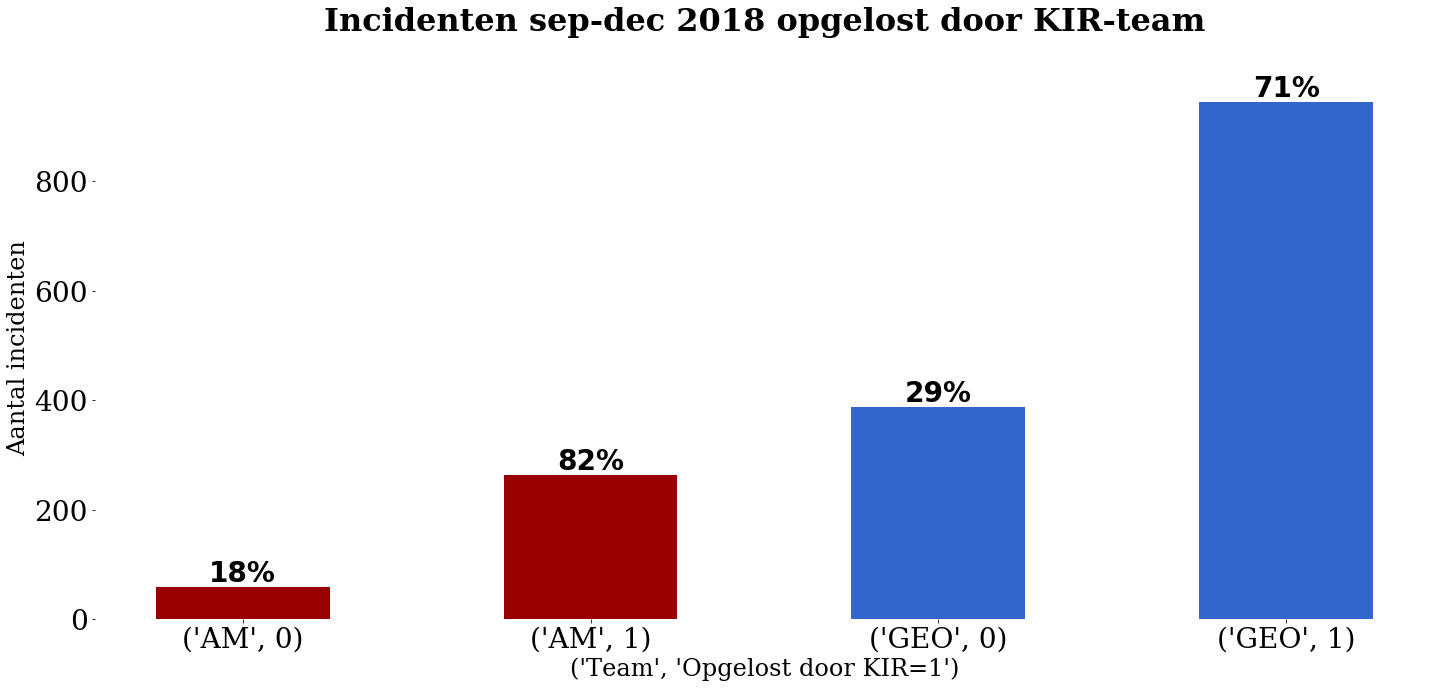

In [309]:
incidenten_ean = incidenten[(incidenten["Resolution Group Name"]=="AM")|(incidenten["Resolution Group Name"]=="GEO")]
incidenten_ean_GeoAM = incidenten_ean.groupby(by=["Resolution Group Name", "KIR"]).count()["Incident ID"]

# Bereken verhouding incidenten opgelost door KIR per team
proportie = []
for i, amount in incidenten_ean_GeoAM.items():
    if i[0] == "AM":
        som = sum(incidenten_ean_GeoAM["AM"])   
    else:
        som = sum(incidenten_ean_GeoAM["GEO"])
    verhouding = int(round(amount/som*100)) #'round' om correct af te ronden
    proportie.append(verhouding)

# Plot aantal incidenten opgelost door KIR-team
barcolors = ["#990000", "#990000", "#3366cc", "#3366cc"]
fig = plt.figure(figsize=(24, 10))
ax = fig.add_subplot(1,1,1)
bar_positions = arange(4) + 1
ax.bar(bar_positions, incidenten_ean_GeoAM.values, width=0.5, color=barcolors)
tick_positions = range(1,5)
ax.set_xticks(tick_positions)
ax.set_xticklabels(incidenten_ean_GeoAM.index)
ax.set_xlabel("('Team', 'Opgelost door KIR=1')", fontsize=24)
ax.set_ylabel("Aantal incidenten", fontsize=24)
ax.tick_params(labelsize=28)
ax.set_title("Incidenten sep-dec 2018 opgelost door KIR-team", fontsize=32, pad=45, fontweight='bold') # Titel van plot
for i, v in enumerate(incidenten_ean_GeoAM):
    ax.text(i+1, v+(0.01*max(incidenten_ean_GeoAM.values)), str(proportie[i])+"%", 
            horizontalalignment='center', color='black', fontdict=textfont)
ax.set_frame_on(b=False)
today = datetime.today().strftime('%Y%m%d')
plt.savefig("incidentOpgelostDoorKIR_"+today+".png")
plt.show()


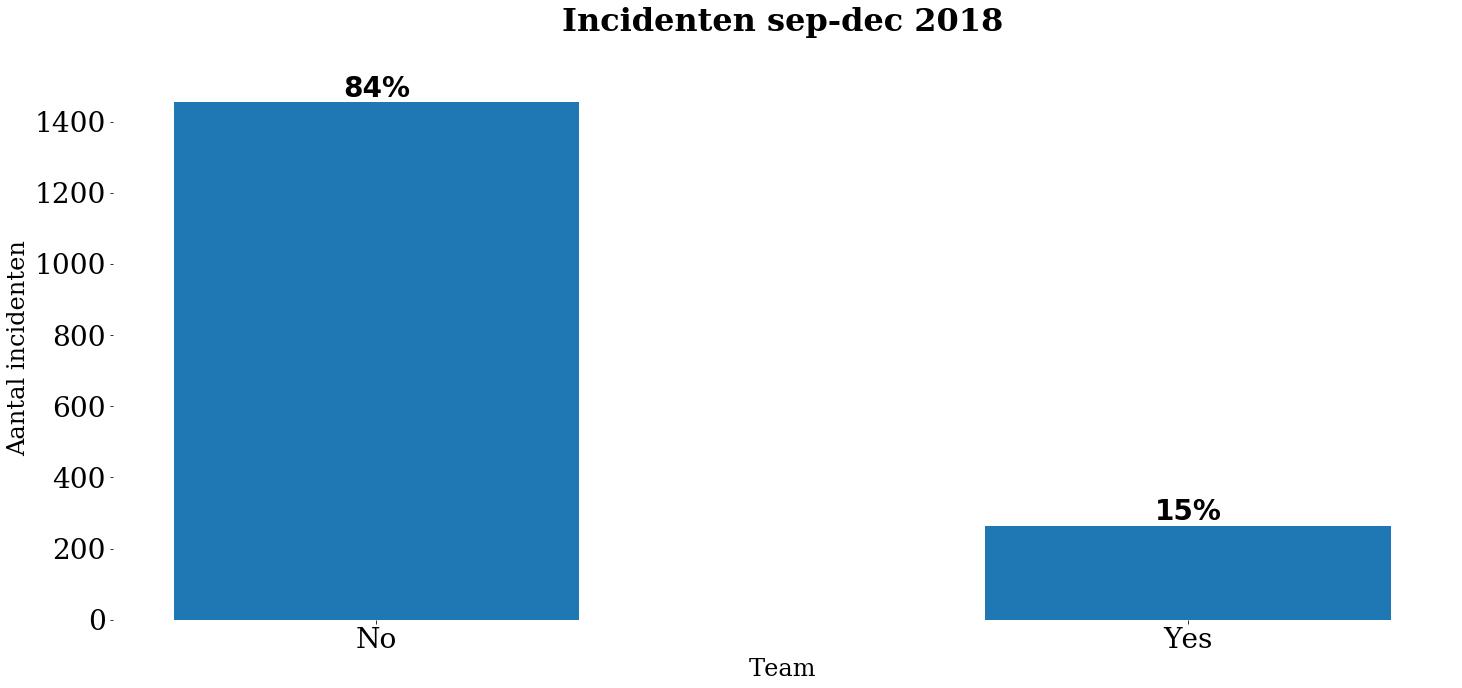

In [311]:
breached_incidenten = incidenten.groupby(by=["Is Breached"]).count()["Incident ID"]
barplot(breached_incidenten, 0.5, "Team", "Aantal incidenten", "incidentBreached", "Incidenten sep-dec 2018")

In [ ]:
#Verhouding breached incidenten per team

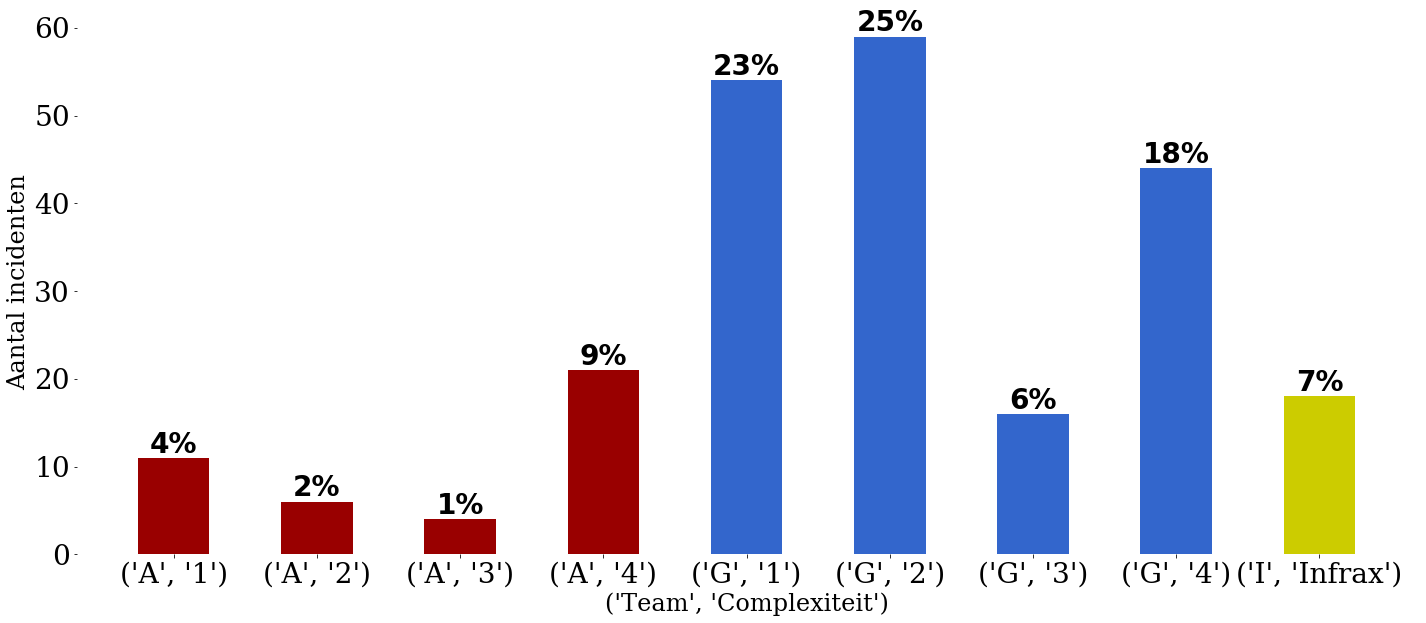

In [19]:
"""
incident_by_team_complex = jul_aug.groupby(by=["Groep", "Complexiteit"]).count()["Incident ID"]
proportie = [int(x/incident_by_team_complex.sum()*100) for x in incident_by_team_complex]

barcolors = ["#990000", "#990000", "#990000", "#990000", "#3366cc", "#3366cc", "#3366cc", "#3366cc", "#cccc00"]

fig = plt.figure(figsize=(24, 10))
ax = fig.add_subplot(1,1,1)
bar_positions = arange(9) + 1
ax.bar(bar_positions, incident_by_team_complex.values, width=0.5, color=barcolors)
tick_positions = range(1,10)
ax.set_xticks(tick_positions)
ax.set_xticklabels(incident_by_team_complex.index)
ax.set_xlabel("('Team', 'Complexiteit')", fontsize=24)
ax.set_ylabel("Aantal incidenten", fontsize=24)
ax.tick_params(labelsize=28)
for i, v in enumerate(incident_by_team_complex):
    ax.text(i+1, v+(0.01*max(incident_by_team_complex.values)), str(proportie[i])+"%", horizontalalignment='center', color='black', fontdict=textfont)
ax.set_frame_on(b=False)
plt.savefig("incident_by_team_complex.png")
plt.show()
"""